In [1]:
import torch
from torch import nn,optim
import torch.nn.functional
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os as os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from scipy.stats import kurtosis,skew
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
import scipy.stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

import pickle
from sklearn.model_selection import cross_val_score

#import warnings

#warnings.simplefilter(action='ignore', category=FutureWarning)



In [2]:
path_dataframes="/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataframes"
condition = "binary_condition"


In [3]:
df_train = pd.read_csv(f"{path_dataframes}/df_train.csv",index_col="index")
df_test = pd.read_csv(f"{path_dataframes}/df_test.csv",index_col="index")
df_labels = pd.read_csv(f"{path_dataframes}/df_labels_train.csv",index_col="index")

In [4]:
df_train.head()

,P1_min,P2_min,P1_HarmonicAmplitudeRatio,P5_min,P5_HarmonicAmplitudeRatio,P2_fft_skewness,P5_entropy,P3_HarmonicAmplitudeRatio,P2_std,P6_PeakValue,P6_HarmonicAmplitudeRatio,P5_variance,P7_25th_percentile,P5_crest_factor,P3_line_integral,P3_min,P2_variance,P1_fft_skewness,P1_clearance_factor,P1_fft_kurtosis
index,,,,,,,,,,,,,,,,,,,,
0,0.151379,0.014342,0.500515,0.002855,0.404716,0.467707,0.501952,0.533264,0.764873,0.524031,0.535152,0.989111,0.557123,0.604552,0.246580,0.062465,0.742221,0.387633,0.835385,0.461597
1,0.151707,0.014171,0.496295,0.002856,0.386983,0.461777,0.501219,0.526576,0.764588,0.518759,0.534254,0.970816,0.548320,0.582898,0.251591,0.062465,0.741918,0.385014,0.856063,0.455896
2,0.152334,0.014027,0.492228,0.002595,0.385712,0.453730,0.545951,0.518393,0.774074,0.508576,0.516265,0.942070,0.515050,0.568830,0.232074,0.062465,0.752047,0.380942,0.884633,0.451143
3,0.152786,0.014103,0.492075,0.002830,0.384052,0.448720,0.514646,0.512105,0.773988,0.500853,0.509841,0.964525,0.546530,0.574005,0.235775,0.062465,0.751956,0.377372,0.884439,0.449168
4,0.152716,0.014159,0.490276,0.003023,0.382267,0.445623,0.512726,0.508852,0.767477,0.498663,0.505803,0.975974,0.537448,0.575556,0.248419,0.062465,0.745000,0.375677,0.873784,0.446502


In [5]:
df_labels

,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
index,,,,,,,,,,,,,,,,
0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
1,2,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
2,3,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
3,4,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
4,5,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1


In [6]:
# df_train = df_train.drop(columns="Unnamed: 0")


In [7]:
df_labels[condition] 

index
0      0
1      0
2      0
3      0
4      0
      ..
172    1
173    1
174    1
175    1
176    1
Name: binary_condition, Length: 177, dtype: int64

In [8]:
df_train

,P1_min,P2_min,P1_HarmonicAmplitudeRatio,P5_min,P5_HarmonicAmplitudeRatio,P2_fft_skewness,P5_entropy,P3_HarmonicAmplitudeRatio,P2_std,P6_PeakValue,P6_HarmonicAmplitudeRatio,P5_variance,P7_25th_percentile,P5_crest_factor,P3_line_integral,P3_min,P2_variance,P1_fft_skewness,P1_clearance_factor,P1_fft_kurtosis
index,,,,,,,,,,,,,,,,,,,,
0,0.151379,0.014342,0.500515,0.002855,0.404716,0.467707,0.501952,0.533264,0.764873,0.524031,0.535152,0.989111,0.557123,0.604552,0.246580,0.062465,0.742221,0.387633,0.835385,0.461597
1,0.151707,0.014171,0.496295,0.002856,0.386983,0.461777,0.501219,0.526576,0.764588,0.518759,0.534254,0.970816,0.548320,0.582898,0.251591,0.062465,0.741918,0.385014,0.856063,0.455896
2,0.152334,0.014027,0.492228,0.002595,0.385712,0.453730,0.545951,0.518393,0.774074,0.508576,0.516265,0.942070,0.515050,0.568830,0.232074,0.062465,0.752047,0.380942,0.884633,0.451143
3,0.152786,0.014103,0.492075,0.002830,0.384052,0.448720,0.514646,0.512105,0.773988,0.500853,0.509841,0.964525,0.546530,0.574005,0.235775,0.062465,0.751956,0.377372,0.884439,0.449168
4,0.152716,0.014159,0.490276,0.003023,0.382267,0.445623,0.512726,0.508852,0.767477,0.498663,0.505803,0.975974,0.537448,0.575556,0.248419,0.062465,0.745000,0.375677,0.873784,0.446502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.339054,0.087961,1.000000,0.005946,1.000000,0.451714,0.313649,0.871921,1.000000,0.887973,0.687747,0.504254,0.638680,0.975993,0.227071,0.060095,1.000000,0.470502,0.598945,0.819289
173,0.824787,0.040686,0.717433,0.880071,0.697196,0.970296,0.000000,0.390217,0.675020,0.996007,0.730663,0.781425,0.114359,0.912180,0.327667,0.062464,0.647391,0.919978,0.428516,0.546360
174,0.301860,0.026831,0.362797,0.592579,0.438246,0.702085,0.487628,0.253419,0.606348,0.550350,0.561968,0.577233,0.570718,0.412224,0.321253,0.055959,0.576285,0.609891,0.737837,0.141901


In [9]:
df_labels[condition]

index
0      0
1      0
2      0
3      0
4      0
      ..
172    1
173    1
174    1
175    1
176    1
Name: binary_condition, Length: 177, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_labels[condition], test_size=0.33, random_state=42)


In [11]:
X_train.columns

Index(['P1_min', 'P2_min', 'P1_HarmonicAmplitudeRatio', 'P5_min',
       'P5_HarmonicAmplitudeRatio', 'P2_fft_skewness', 'P5_entropy',
       'P3_HarmonicAmplitudeRatio', 'P2_std', 'P6_PeakValue',
       'P6_HarmonicAmplitudeRatio', 'P5_variance', 'P7_25th_percentile',
       'P5_crest_factor', 'P3_line_integral', 'P3_min', 'P2_variance',
       'P1_fft_skewness', 'P1_clearance_factor', 'P1_fft_kurtosis'],
      dtype='object')

Miglior modello trovato: RandomForestClassifier(random_state=123)
Migliori parametri: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Migliore accuratezza durante la cross validation: 0.9533333333333333
Accuratezza sul set di test: 1.0
Confusion matrix: 
[[ 7  0]
 [ 0 20]]


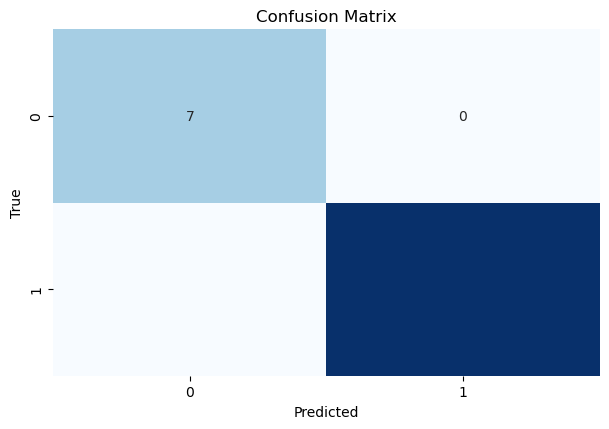

In [12]:
param_grid = {
    'n_estimators': [50, 100, 150,200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# from sklearn.metrics import confusion_matrix
# import seaborn as sns

random_states = [123]

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df_train, df_labels[condition], test_size=0.15, random_state=random_state)

    rf_model = RandomForestClassifier(random_state=random_state)

    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Miglior modello trovato:", best_model)
    print("Migliori parametri:", best_params)
    print("Migliore accuratezza durante la cross validation:", best_score)

    test_accuracy = best_model.score(X_test, y_test)
    print("Accuratezza sul set di test:", test_accuracy)
    
    
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    print("Confusion matrix: ")
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.tight_layout() 
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print()


In [13]:
# rf_classifier = RandomForestClassifier(n_estimators=150,random_state=123)

# rf_classifier.fit(X_train, y_train)

# y_pred = rf_classifier.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

In [14]:
# df_test = df_test.drop(columns="Unnamed: 0")


In [15]:
# plt.scatter(df_test.index,df_test["P5_variance"])

In [16]:
pred = best_model.predict(df_test)

In [17]:
new_index_values = range(178, 224)
df_test.reset_index(drop=True, inplace=True)
df_test.index = new_index_values

In [18]:
df_test["pred"] = pred

In [19]:
df_pred_test = df_test.loc[df_test['pred'] == 1]

In [20]:
df_pred_test

,P1_min,P2_min,P1_HarmonicAmplitudeRatio,P5_min,P5_HarmonicAmplitudeRatio,P2_fft_skewness,P5_entropy,P3_HarmonicAmplitudeRatio,P2_std,P6_PeakValue,...,P5_variance,P7_25th_percentile,P5_crest_factor,P3_line_integral,P3_min,P2_variance,P1_fft_skewness,P1_clearance_factor,P1_fft_kurtosis,pred
178,0.371555,0.892153,0.534043,0.048438,0.529602,0.696309,0.510393,0.664222,0.826867,0.617778,...,0.741722,0.607413,0.683546,0.284698,0.414883,0.808836,0.722514,0.878211,0.431102,1
179,0.182168,0.007976,0.524429,0.003761,0.428010,0.632379,0.514892,0.554220,0.705973,0.587278,...,0.987083,0.556326,0.634758,0.276441,0.083922,0.679828,0.402390,0.729427,0.497599,1
184,1.861598,1.726244,0.443278,1.884693,0.472094,0.662373,-0.883680,0.573696,0.816715,0.542088,...,1.022777,7.609692,0.079709,41.984366,1.543868,0.797862,0.496075,0.921347,0.284268,1
186,0.307737,0.036904,0.519669,0.592579,0.621510,0.511675,0.693182,0.566072,0.461677,0.870133,...,0.787317,0.489964,0.635212,0.274434,0.054973,0.430374,0.496104,0.715520,0.219519,1
188,-0.172830,0.029750,0.532900,0.055736,0.471278,0.571164,0.293431,0.509654,0.746639,0.642360,...,0.970282,0.593902,0.685024,0.540332,0.056473,0.722813,0.438886,0.848656,0.526592,1
190,0.155755,0.013683,0.505549,0.042128,0.431533,0.506134,0.328985,0.545933,0.770904,0.574473,...,0.933203,0.539040,0.612839,0.243005,0.062464,0.748659,0.398297,0.867371,0.472396,1
192,1.606368,1.432627,0.879040,1.828610,0.876142,1.101754,-1.042768,0.889819,1.398747,1.645348,...,1.692797,7.381842,0.597524,42.115410,0.901093,1.468996,0.966496,1.169796,0.595606,1
193,0.436355,0.434062,0.836380,0.007586,0.851832,0.000000,1.000000,0.910972,0.675365,0.601851,...,0.810122,0.605383,0.630216,0.245369,0.054507,0.647751,0.079989,0.826624,0.395871,1
196,0.339054,0.083833,0.706956,0.003234,0.800488,0.454736,0.572608,0.836967,0.778163,0.798202,...,0.561733,0.662870,0.837720,0.307995,0.067177,0.756421,0.590508,0.921245,0.438955,1
197,0.405805,0.025448,0.183778,0.419350,0.263327,0.652947,0.822837,0.294511,0.467494,0.180911,...,0.793566,0.427759,0.312930,0.290987,0.055546,0.436139,0.720613,0.584838,0.088108,1


In [21]:
# with open(f'/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/models/rf_anomaly_classifier.pkl', 'wb') as file:
#     pickle.dump(best_rf_model, file)

In [22]:
# # Carica il modello da un file
# with open('random_forest_model.pkl', 'rb') as file:
#     model = pickle.load(file)

# # Utilizzo del modello per fare predizioni
# predictions = model.predict(X_test)


In [23]:
# anomalia_indices = np.where(y_pred == 1)
# print(anomalia_indices)
# X_test_df = pd.DataFrame(X_test)

# X_anomaly = X_test_df.iloc[anomalia_indices]





In [24]:
# X_anomaly.index.values

In [25]:
# selected_rows = df_labels.loc[df_labels['Condition'].isin([2, 3])]
# print(selected_rows.index)
# df_labels_anomaly = df_labels.iloc[selected_rows.index.values]
# df_anomaly = df_train.iloc[selected_rows.index.values]

In [26]:
df_labels_anomaly = df_labels[105:177]


In [27]:
df_labels_anomaly 


,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
index,,,,,,,,,,,,,,,,
105,106,1,2,0,100,100,100,0,0,0,0,0,0,0,0,1
106,107,1,2,25,100,100,100,0,0,0,0,0,0,0,0,1
107,108,1,2,50,100,100,100,0,0,0,0,0,0,0,0,1
108,109,1,2,75,100,100,100,0,0,0,0,0,0,0,0,1
109,110,1,2,100,0,100,100,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1


In [28]:
# df_labels_anomaly = df_labels_anomaly.drop(columns="Unnamed: 0")

In [29]:
df_pred_test.to_csv(f"{path_dataframes}/df_test_anomaly.csv",index_label='index')
df_labels_anomaly.to_csv(f"{path_dataframes}/df_anomaly_labels.csv",index_label="index")

In [30]:
df_labels_anomaly

,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
index,,,,,,,,,,,,,,,,
105,106,1,2,0,100,100,100,0,0,0,0,0,0,0,0,1
106,107,1,2,25,100,100,100,0,0,0,0,0,0,0,0,1
107,108,1,2,50,100,100,100,0,0,0,0,0,0,0,0,1
108,109,1,2,75,100,100,100,0,0,0,0,0,0,0,0,1
109,110,1,2,100,0,100,100,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1
